In [1]:
import scanpy as sc
import scvelo as scv
import anndata
import pandas as pd
import cellrank as cr
import numpy as np
import scachepy

np.random.seed(42)

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', frameon=True)
cr.settings.verbosity = 2

In [2]:
adata_w_velo = scv.read("./removed_layers_before_latent_time.h5ad") # See 'strip_anndat_for_latent_time' notebook
# Needs ~23gb to load

In [3]:
adata_w_velo

AnnData object with n_obs × n_vars = 58560 × 21781
    obs: 'timepoint', 'bulk_cellype', 'cell_subtype', 'sample_batch', 'Clusters', '_X', '_Y', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'clusters_gradients', 'terminal_states', 'terminal_states_probs', 'to_terminal_states_dp', 'initial_states', 'initial_states_probs', 'from_initial_states_dp', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_alignment_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'velocity_genes', 'fit_r2', 'fit_diff_kinetics', 'fit_pval_kinetics'
    uns: 'T_bwd_params', 'T_fwd_params', 'cell_subtype_colors', 'clusters_gradients_colors', 'eig_bwd', 'eig_fwd', 'from_initial_states_colors', 'from_initial_states_names', 'initial_states_colors', 'initial_states_names', 'neighbors'

In [4]:
# Needed - velocity, initital states probs, terminal states probs

scv.tl.recover_latent_time(
    adata_w_velo, root_key="initial_states_probs", end_key="terminal_states_probss"
)

computing latent time using initial_states_probs as prior
    finished (0:02:32) --> added 
    'latent_time', shared time (adata.obs)


In [7]:
adata_w_velo.write("./with_latent_time.h5ad", compression = 'gzip')

In [5]:
adata_lite = anndata.AnnData(X=None,
                obs = adata_w_velo.obs,
                var = adata_w_velo.var,
                uns = adata_w_velo.uns,
                obsm = adata_w_velo.obsm,
                varm = adata_w_velo.varm)

In [6]:
keys = ['to_terminal_states_names', 'from_initial_states_names', 'initial_states_names']
out_dict = {}
for key in keys:
    out_dict[key] = adata_lite.uns[key]
    
print(out_dict)
adata_lite.uns = out_dict

{'to_terminal_states_names': array(['miEC_1', 'Lymphatic_1', 'Lymphatic_2', 'Arterial maEC',
       'Venous maEC', 'miEC_2', 'Proliferating\nmiEC', 'Car4+', 'miEC_3'],
      dtype=object), 'from_initial_states_names': array(['Lymphatic', 'Proliferating\nmiEC', 'Arterial maEC', 'miEC',
       'Car4+'], dtype=object), 'initial_states_names': array(['Lymphatic', 'Proliferating\nmiEC', 'Arterial maEC', 'miEC',
       'Car4+'], dtype=object)}


In [7]:
adata_lite.write("./only_metadata.h5ad", compression = 'gzip')

In [6]:
# Create Ms
full_adata = scv.read("./intermediate_before_latent_time.h5ad")

In [8]:
import scipy.io
from scipy.sparse import csr_matrix
scipy.io.mmwrite('meso_expression_Ms.mtx', csr_matrix(full_adata.layers['Ms']))

In [9]:
full_adata.obs['latent_time'] = adata_w_velo.obs['latent_time']

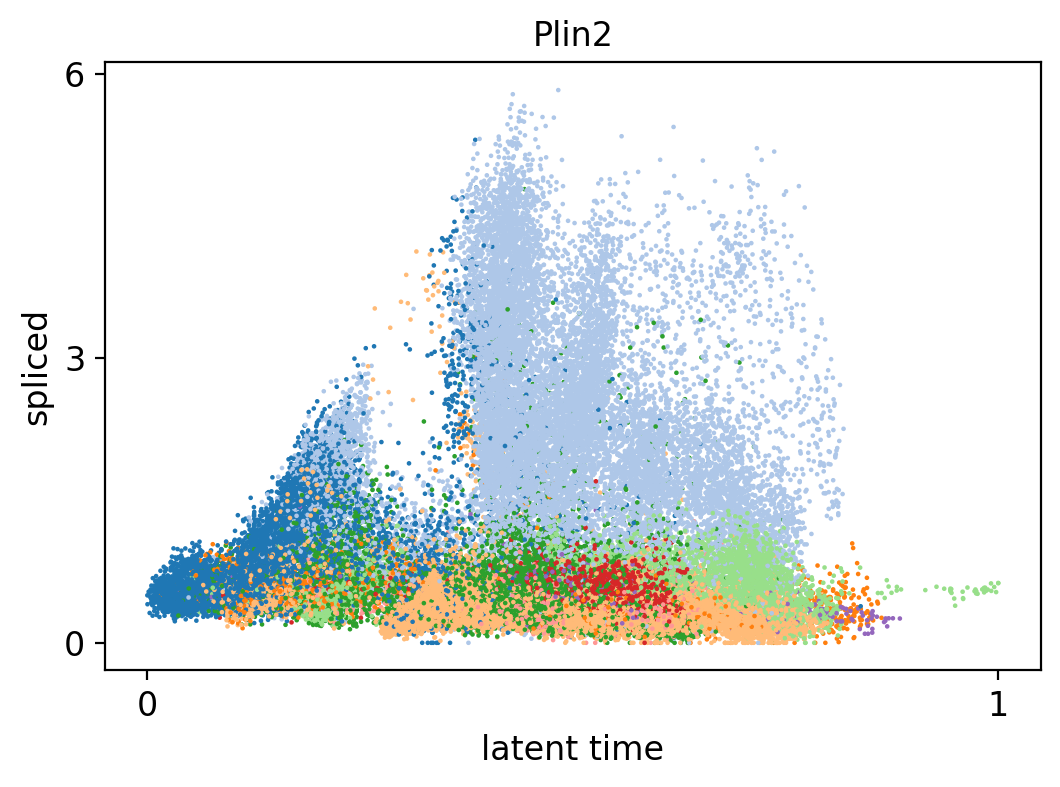

In [11]:
scv.pl.scatter(full_adata, x='latent_time', y=['Plin2'], frameon=True, color = 'cell_subtype',
              layer = 'Ms') 

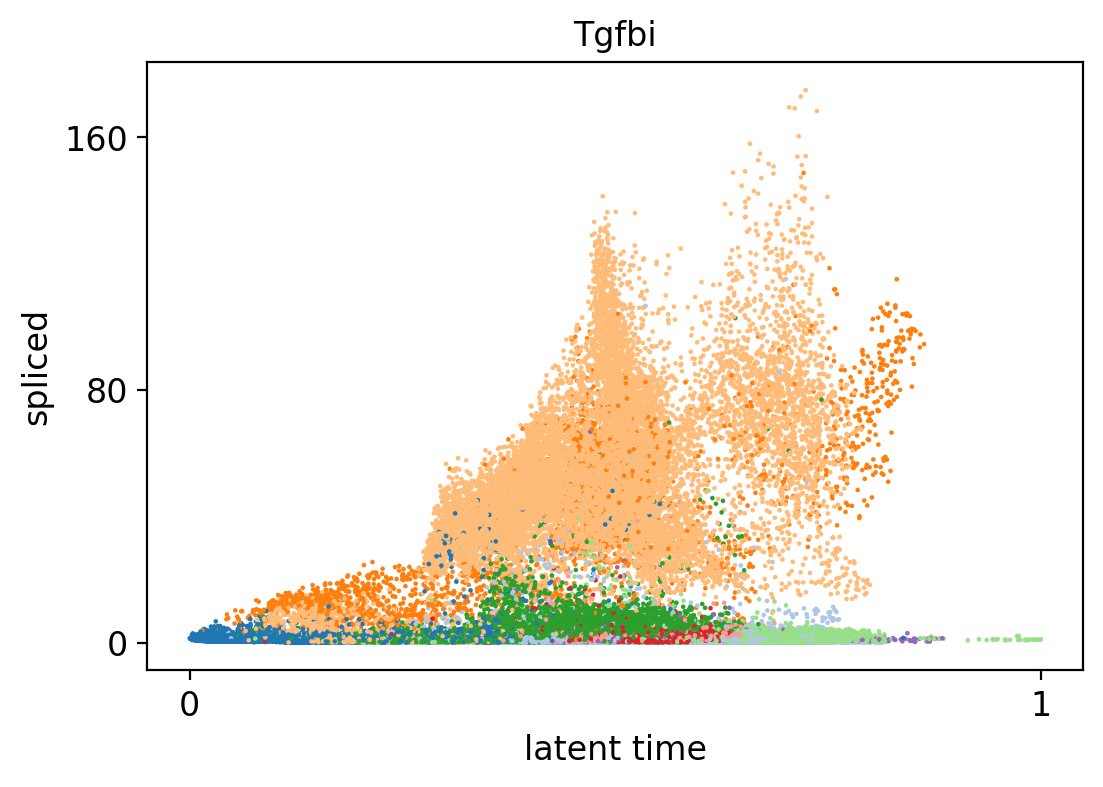

In [12]:
scv.pl.scatter(full_adata, x='latent_time', y=['Tgfbi'], frameon=True, color = 'cell_subtype',
              layer = 'Ms')

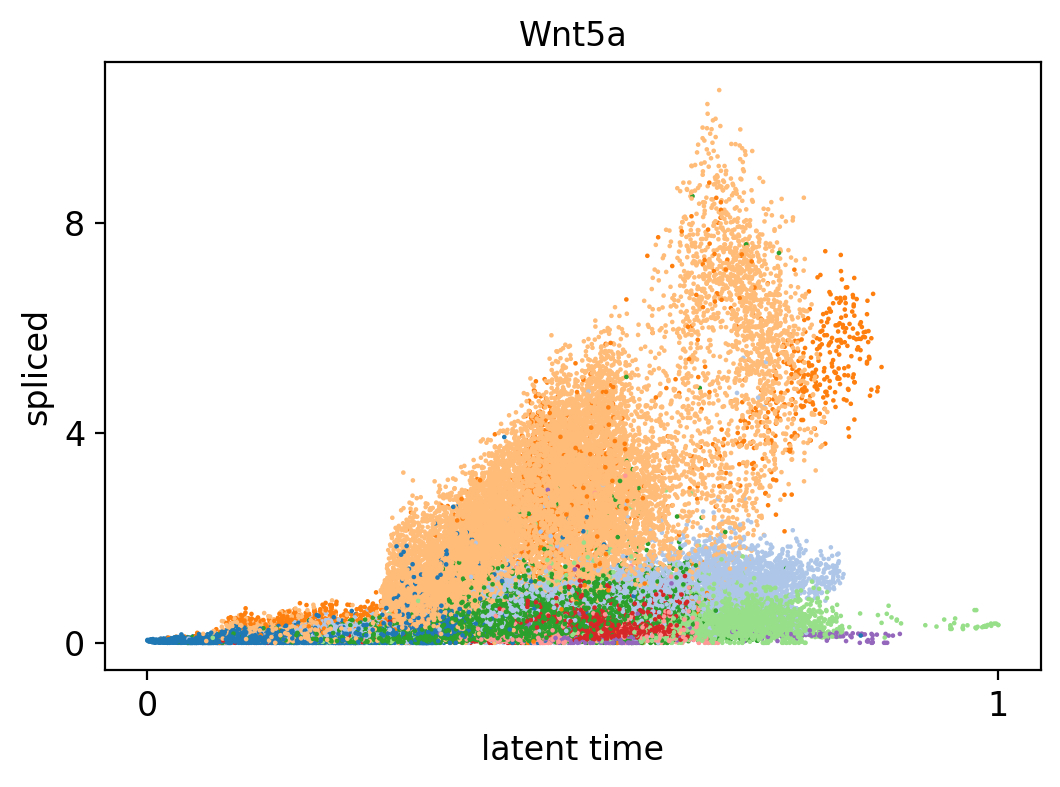

In [13]:
scv.pl.scatter(full_adata, x='latent_time', y=['Wnt5a'], frameon=True, color = 'cell_subtype',
              layer = 'Ms')

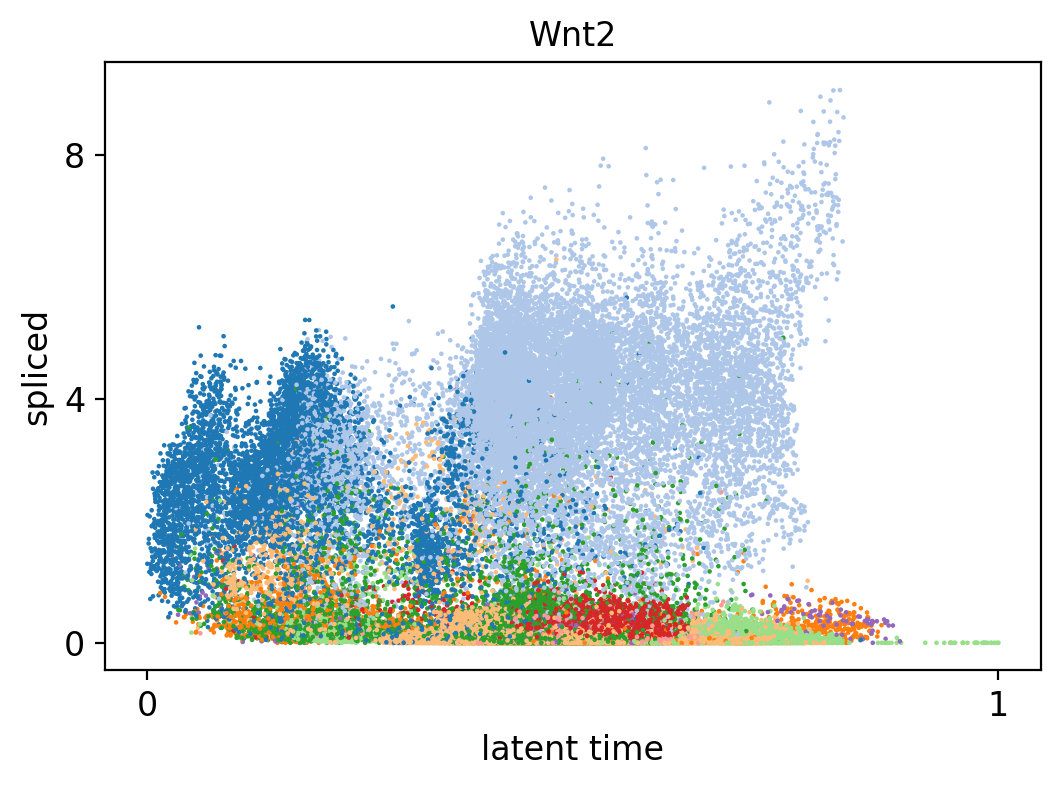

In [14]:
scv.pl.scatter(full_adata, x='latent_time', y=['Wnt2'], frameon=True, color = 'cell_subtype',
              layer = 'Ms')

In [ ]:
scv.pl.scatter(full_adata, x='latent_time', y=['Wnt2'], frameon=True, color = 'cell_subtype',
              layer = 'Ms')